<a href="https://colab.research.google.com/github/mohamedsaeed8223/Pytorch-GAN/blob/main/PyTorch_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchvision.utils import save_image
import torch.nn.functional as F

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [25]:
latent_dim = 100
hidden_dim = 256
image_size = 784
batch_size = 128
learning_rate = 0.0002
epochs = 40

In [16]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [17]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [18]:
class Generator(nn.Module):
  def __init__(self, latent_dim, hidden_dim, image_size):
    super(Generator, self).__init__()
    self.fc1 = nn.Linear(latent_dim, hidden_dim)
    self.fc2 = nn.Linear(hidden_dim, hidden_dim)
    self.fc3 = nn.Linear(hidden_dim, image_size)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    return F.tanh(self.fc3(x))

In [19]:
class Discriminator(nn.Module):
  def __init__(self, image_size, hidden_dim):
    super(Discriminator, self).__init__()
    self.fc1 = nn.Linear(image_size, hidden_dim)
    self.fc2 = nn.Linear(hidden_dim, hidden_dim)
    self.fc3 = nn.Linear(hidden_dim, 1)

  def forward(self, x):
    x = F.leaky_relu(self.fc1(x))
    x = F.leaky_relu(self.fc2(x))
    return F.sigmoid(self.fc3(x))

In [20]:
generator = Generator(latent_dim, hidden_dim, image_size).to(device)
discriminator = Discriminator(image_size, hidden_dim).to(device)

In [21]:
criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=learning_rate)
optimizer_d = optim.Adam(discriminator.parameters(), lr=learning_rate)

In [22]:
def generate_noise(batch_size, latent_dim):
  return torch.randn(batch_size, latent_dim).to(device)

In [23]:
def visualize_generated_samples(fake_images, epoch):
  fake_images = fake_images.view(fake_images.size(0), 1, 28, 28)
  fake_images = fake_images.cpu().data
  grid_img = torchvision.utils.make_grid(fake_images, nrow=8, normalize = True)

  plt.figure(figsize=(8,8))
  plt.imshow(grid_img.permute(1, 2, 0))
  plt.axis('off')
  plt.show()

Epoch [1/40], Step [100/469], d_loss: 0.5303, g_loss: 3.8677
Epoch [1/40], Step [200/469], d_loss: 0.4625, g_loss: 2.3916
Epoch [1/40], Step [300/469], d_loss: 0.4355, g_loss: 2.8987
Epoch [1/40], Step [400/469], d_loss: 0.4099, g_loss: 2.8717
Epoch [2/40], Step [100/469], d_loss: 0.3086, g_loss: 4.6577
Epoch [2/40], Step [200/469], d_loss: 0.5609, g_loss: 3.1525
Epoch [2/40], Step [300/469], d_loss: 1.4823, g_loss: 2.5712
Epoch [2/40], Step [400/469], d_loss: 0.4992, g_loss: 5.1060
Epoch [3/40], Step [100/469], d_loss: 0.9563, g_loss: 4.2100
Epoch [3/40], Step [200/469], d_loss: 0.3875, g_loss: 4.3467
Epoch [3/40], Step [300/469], d_loss: 0.3033, g_loss: 4.0097
Epoch [3/40], Step [400/469], d_loss: 0.4141, g_loss: 2.3876
Epoch [4/40], Step [100/469], d_loss: 0.5064, g_loss: 2.6506
Epoch [4/40], Step [200/469], d_loss: 0.6915, g_loss: 3.0747
Epoch [4/40], Step [300/469], d_loss: 0.5460, g_loss: 3.1281
Epoch [4/40], Step [400/469], d_loss: 0.3217, g_loss: 2.6938
Epoch [5/40], Step [100/

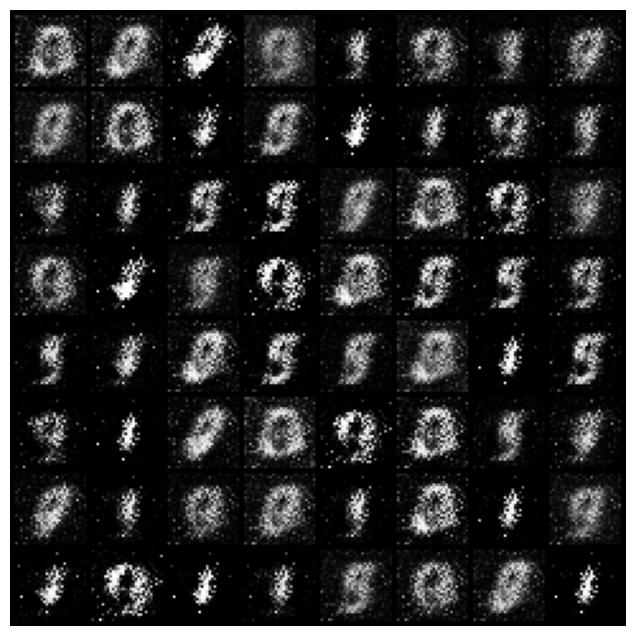

Epoch [6/40], Step [100/469], d_loss: 0.4431, g_loss: 3.5729
Epoch [6/40], Step [200/469], d_loss: 0.2704, g_loss: 3.4560
Epoch [6/40], Step [300/469], d_loss: 0.5499, g_loss: 4.3790
Epoch [6/40], Step [400/469], d_loss: 0.4173, g_loss: 4.5667
Epoch [7/40], Step [100/469], d_loss: 0.2944, g_loss: 5.3388
Epoch [7/40], Step [200/469], d_loss: 0.4295, g_loss: 3.2731
Epoch [7/40], Step [300/469], d_loss: 0.3660, g_loss: 4.2963
Epoch [7/40], Step [400/469], d_loss: 0.4951, g_loss: 2.9014
Epoch [8/40], Step [100/469], d_loss: 0.3491, g_loss: 3.5443
Epoch [8/40], Step [200/469], d_loss: 0.5349, g_loss: 3.4884
Epoch [8/40], Step [300/469], d_loss: 0.5007, g_loss: 3.8450
Epoch [8/40], Step [400/469], d_loss: 0.4535, g_loss: 3.0828
Epoch [9/40], Step [100/469], d_loss: 0.2639, g_loss: 5.2265
Epoch [9/40], Step [200/469], d_loss: 0.3669, g_loss: 4.0152
Epoch [9/40], Step [300/469], d_loss: 0.3414, g_loss: 3.1080
Epoch [9/40], Step [400/469], d_loss: 0.5912, g_loss: 2.9501
Epoch [10/40], Step [100

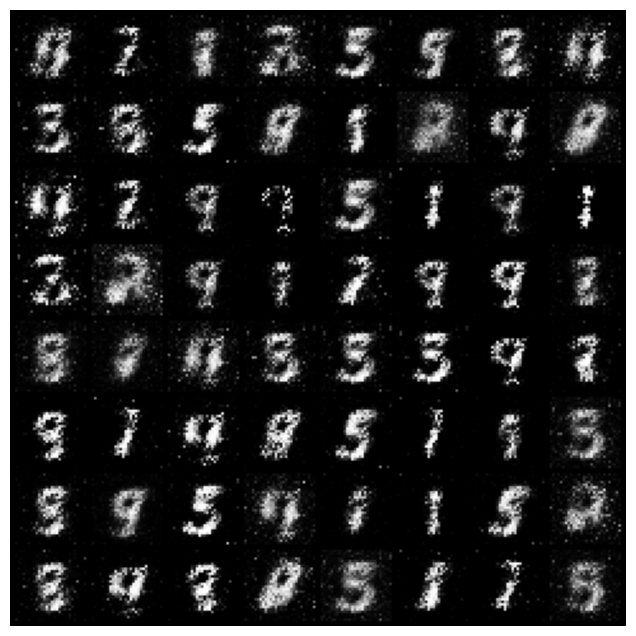

Epoch [11/40], Step [100/469], d_loss: 0.5499, g_loss: 3.1418
Epoch [11/40], Step [200/469], d_loss: 0.3148, g_loss: 4.4107
Epoch [11/40], Step [300/469], d_loss: 0.3903, g_loss: 3.1836
Epoch [11/40], Step [400/469], d_loss: 0.4067, g_loss: 3.0357
Epoch [12/40], Step [100/469], d_loss: 0.5503, g_loss: 2.5785
Epoch [12/40], Step [200/469], d_loss: 0.4514, g_loss: 2.1910
Epoch [12/40], Step [300/469], d_loss: 0.4097, g_loss: 2.9278
Epoch [12/40], Step [400/469], d_loss: 0.3694, g_loss: 5.3142
Epoch [13/40], Step [100/469], d_loss: 0.3865, g_loss: 3.9000
Epoch [13/40], Step [200/469], d_loss: 0.5332, g_loss: 3.5345
Epoch [13/40], Step [300/469], d_loss: 0.4340, g_loss: 3.8556
Epoch [13/40], Step [400/469], d_loss: 0.5280, g_loss: 4.5355
Epoch [14/40], Step [100/469], d_loss: 0.2592, g_loss: 5.0002
Epoch [14/40], Step [200/469], d_loss: 0.3752, g_loss: 3.0139
Epoch [14/40], Step [300/469], d_loss: 0.3188, g_loss: 4.5930
Epoch [14/40], Step [400/469], d_loss: 0.6178, g_loss: 4.2984
Epoch [1

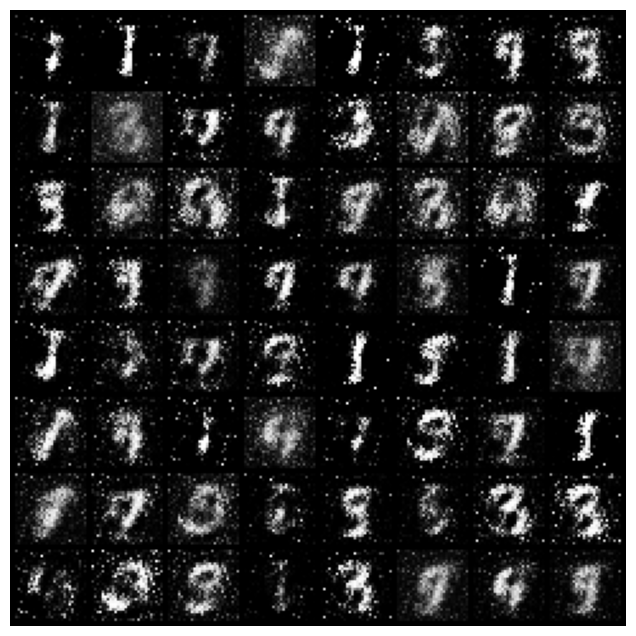

Epoch [16/40], Step [100/469], d_loss: 0.6369, g_loss: 2.4340
Epoch [16/40], Step [200/469], d_loss: 0.4327, g_loss: 3.9852
Epoch [16/40], Step [300/469], d_loss: 0.2983, g_loss: 3.5147
Epoch [16/40], Step [400/469], d_loss: 0.4656, g_loss: 3.1598
Epoch [17/40], Step [100/469], d_loss: 0.4373, g_loss: 2.6650
Epoch [17/40], Step [200/469], d_loss: 0.3661, g_loss: 2.5616
Epoch [17/40], Step [300/469], d_loss: 0.4380, g_loss: 3.7684
Epoch [17/40], Step [400/469], d_loss: 0.5272, g_loss: 3.3866
Epoch [18/40], Step [100/469], d_loss: 0.5531, g_loss: 2.9136
Epoch [18/40], Step [200/469], d_loss: 0.3369, g_loss: 3.0235
Epoch [18/40], Step [300/469], d_loss: 0.3997, g_loss: 2.0906
Epoch [18/40], Step [400/469], d_loss: 0.4801, g_loss: 2.0566
Epoch [19/40], Step [100/469], d_loss: 0.3069, g_loss: 2.8634
Epoch [19/40], Step [200/469], d_loss: 0.8742, g_loss: 3.3126
Epoch [19/40], Step [300/469], d_loss: 0.5270, g_loss: 3.5903
Epoch [19/40], Step [400/469], d_loss: 0.6451, g_loss: 3.2635
Epoch [2

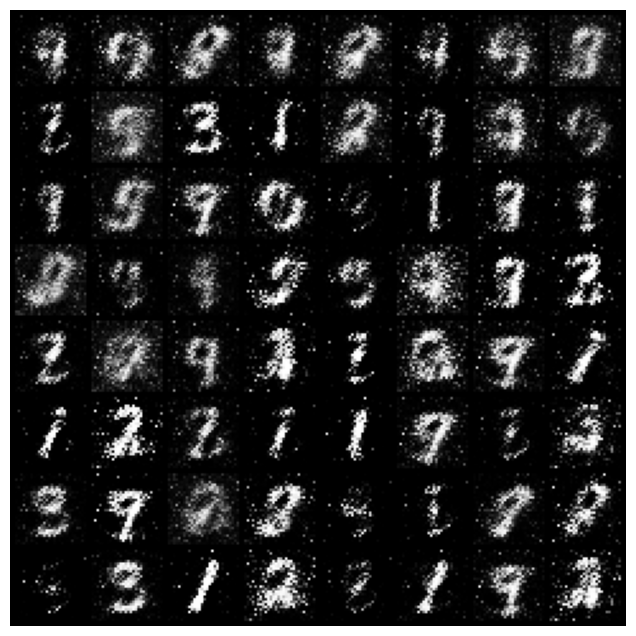

Epoch [21/40], Step [100/469], d_loss: 0.3955, g_loss: 3.2213
Epoch [21/40], Step [200/469], d_loss: 0.6089, g_loss: 3.6971
Epoch [21/40], Step [300/469], d_loss: 0.4380, g_loss: 2.7686
Epoch [21/40], Step [400/469], d_loss: 0.3056, g_loss: 3.9449
Epoch [22/40], Step [100/469], d_loss: 0.4357, g_loss: 3.1148
Epoch [22/40], Step [200/469], d_loss: 0.4248, g_loss: 2.9801
Epoch [22/40], Step [300/469], d_loss: 0.2239, g_loss: 4.0733
Epoch [22/40], Step [400/469], d_loss: 0.3983, g_loss: 3.3743
Epoch [23/40], Step [100/469], d_loss: 0.3150, g_loss: 3.8004
Epoch [23/40], Step [200/469], d_loss: 0.5395, g_loss: 2.8462
Epoch [23/40], Step [300/469], d_loss: 0.6160, g_loss: 3.2651
Epoch [23/40], Step [400/469], d_loss: 0.4303, g_loss: 3.3975
Epoch [24/40], Step [100/469], d_loss: 0.4521, g_loss: 2.9908
Epoch [24/40], Step [200/469], d_loss: 0.3889, g_loss: 3.1189
Epoch [24/40], Step [300/469], d_loss: 0.5113, g_loss: 2.5469
Epoch [24/40], Step [400/469], d_loss: 0.6766, g_loss: 3.6566
Epoch [2

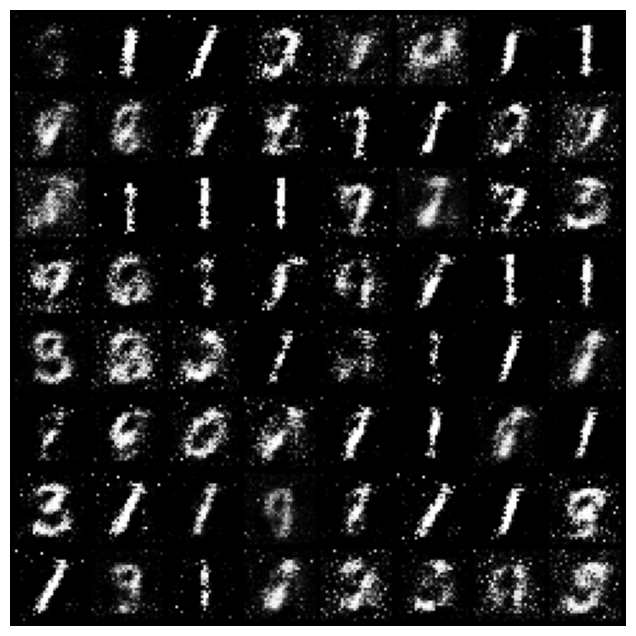

Epoch [26/40], Step [100/469], d_loss: 0.4898, g_loss: 3.3855
Epoch [26/40], Step [200/469], d_loss: 0.5905, g_loss: 2.7166
Epoch [26/40], Step [300/469], d_loss: 0.4694, g_loss: 2.2997
Epoch [26/40], Step [400/469], d_loss: 0.6412, g_loss: 2.9056
Epoch [27/40], Step [100/469], d_loss: 0.5068, g_loss: 2.8037
Epoch [27/40], Step [200/469], d_loss: 0.5354, g_loss: 3.6709
Epoch [27/40], Step [300/469], d_loss: 0.5165, g_loss: 3.5713
Epoch [27/40], Step [400/469], d_loss: 0.5812, g_loss: 2.7027
Epoch [28/40], Step [100/469], d_loss: 0.4666, g_loss: 3.2403
Epoch [28/40], Step [200/469], d_loss: 0.8506, g_loss: 2.8624
Epoch [28/40], Step [300/469], d_loss: 0.4891, g_loss: 2.6194
Epoch [28/40], Step [400/469], d_loss: 0.5461, g_loss: 3.0364
Epoch [29/40], Step [100/469], d_loss: 0.5882, g_loss: 2.8424
Epoch [29/40], Step [200/469], d_loss: 0.7603, g_loss: 2.3278
Epoch [29/40], Step [300/469], d_loss: 0.8556, g_loss: 2.4655
Epoch [29/40], Step [400/469], d_loss: 0.6332, g_loss: 3.7288
Epoch [3

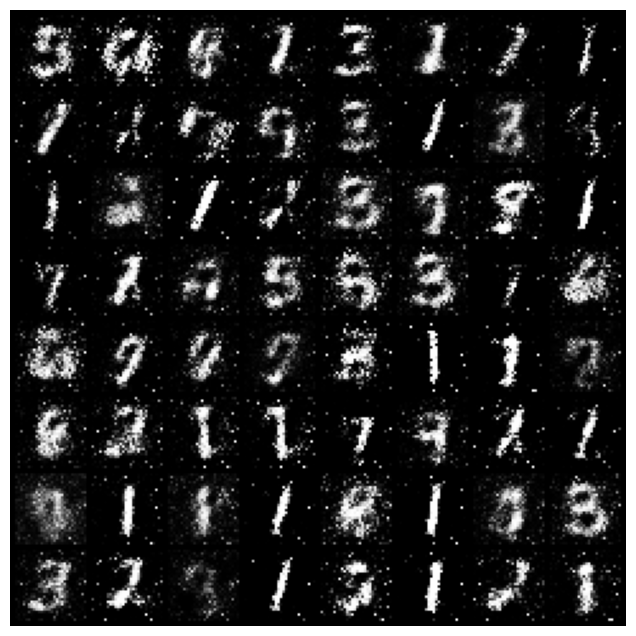

Epoch [31/40], Step [100/469], d_loss: 0.4138, g_loss: 4.2274
Epoch [31/40], Step [200/469], d_loss: 0.7149, g_loss: 3.5353
Epoch [31/40], Step [300/469], d_loss: 1.0398, g_loss: 2.6837
Epoch [31/40], Step [400/469], d_loss: 0.3984, g_loss: 3.4595
Epoch [32/40], Step [100/469], d_loss: 0.5816, g_loss: 2.6947
Epoch [32/40], Step [200/469], d_loss: 0.4874, g_loss: 4.0410
Epoch [32/40], Step [300/469], d_loss: 0.5129, g_loss: 3.7265
Epoch [32/40], Step [400/469], d_loss: 0.3292, g_loss: 3.1962
Epoch [33/40], Step [100/469], d_loss: 0.5485, g_loss: 3.6316
Epoch [33/40], Step [200/469], d_loss: 0.4520, g_loss: 3.9017
Epoch [33/40], Step [300/469], d_loss: 0.6865, g_loss: 2.6971
Epoch [33/40], Step [400/469], d_loss: 0.4982, g_loss: 2.3152
Epoch [34/40], Step [100/469], d_loss: 0.5463, g_loss: 2.8454
Epoch [34/40], Step [200/469], d_loss: 0.3479, g_loss: 3.2935
Epoch [34/40], Step [300/469], d_loss: 0.7987, g_loss: 1.9992
Epoch [34/40], Step [400/469], d_loss: 0.4327, g_loss: 3.0405
Epoch [3

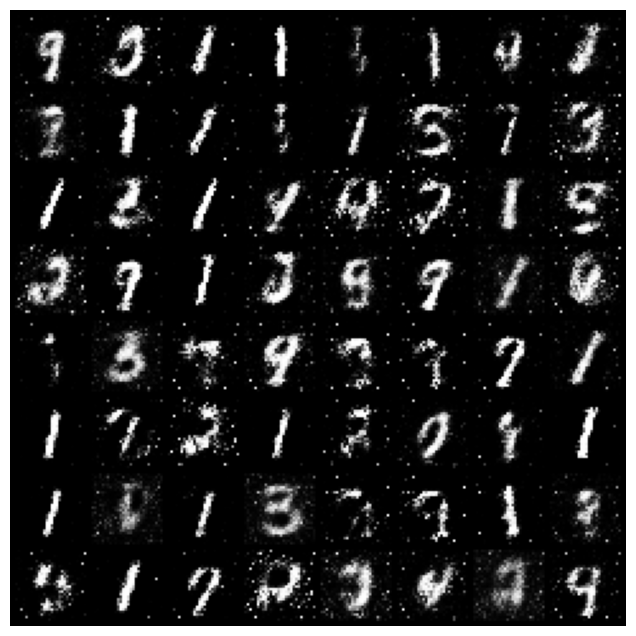

Epoch [36/40], Step [100/469], d_loss: 0.4358, g_loss: 3.8255
Epoch [36/40], Step [200/469], d_loss: 0.5268, g_loss: 2.8928
Epoch [36/40], Step [300/469], d_loss: 0.5212, g_loss: 2.7430
Epoch [36/40], Step [400/469], d_loss: 0.5282, g_loss: 2.5685
Epoch [37/40], Step [100/469], d_loss: 0.6878, g_loss: 2.4156
Epoch [37/40], Step [200/469], d_loss: 0.6843, g_loss: 2.9769
Epoch [37/40], Step [300/469], d_loss: 0.5632, g_loss: 2.8215
Epoch [37/40], Step [400/469], d_loss: 0.6840, g_loss: 2.4638
Epoch [38/40], Step [100/469], d_loss: 0.4735, g_loss: 2.6440
Epoch [38/40], Step [200/469], d_loss: 0.4603, g_loss: 3.2822
Epoch [38/40], Step [300/469], d_loss: 0.5935, g_loss: 2.9347
Epoch [38/40], Step [400/469], d_loss: 0.6346, g_loss: 3.2453
Epoch [39/40], Step [100/469], d_loss: 0.5519, g_loss: 2.7653
Epoch [39/40], Step [200/469], d_loss: 0.7109, g_loss: 3.1905
Epoch [39/40], Step [300/469], d_loss: 0.5160, g_loss: 2.7362
Epoch [39/40], Step [400/469], d_loss: 0.6635, g_loss: 2.4608
Epoch [4

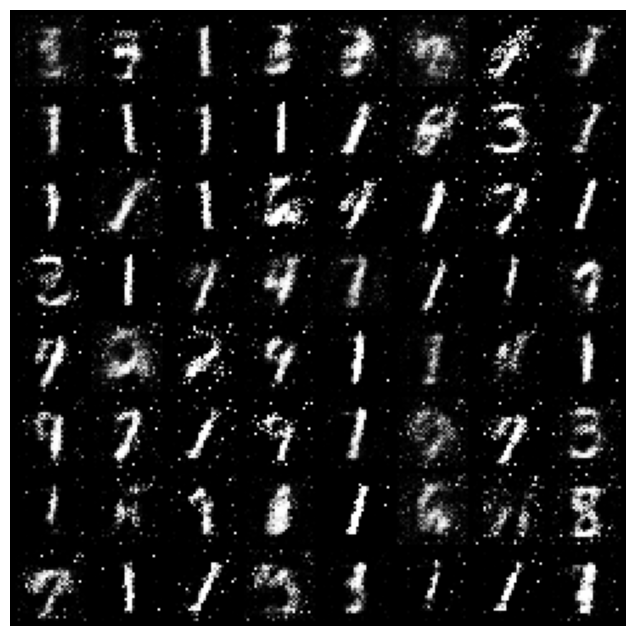

In [26]:
# Training Loop
for epoch in range(epochs):
  for i, (images, _) in enumerate(train_loader):
    current_batch_size = images.size(0)
    real_labels = torch.ones(current_batch_size, 1).to(device)
    fake_labels = torch.zeros(current_batch_size, 1).to(device)

    real_images = images.view(current_batch_size, -1).to(device)

    #train discriminator
    outputs = discriminator(real_images)
    d_loss_real = criterion(outputs, real_labels)

    noise = generate_noise(current_batch_size, latent_dim)
    fake_images = generator(noise)
    outputs = discriminator(fake_images.detach())

    d_loss_fake = criterion(outputs, fake_labels)

    d_loss = d_loss_real + d_loss_fake

    optimizer_d.zero_grad()
    d_loss.backward()
    optimizer_d.step()

    # train generator
    noise = generate_noise(current_batch_size, latent_dim)
    fake_images = generator(noise)

    outputs = discriminator(fake_images)
    g_loss = criterion(outputs, real_labels)

    optimizer_g.zero_grad()
    g_loss.backward()
    optimizer_g.step()

    if (i+1) % 100 == 0:
      print(f"Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(train_loader)}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}")
  if (epoch+1) % 5 == 0:
    noise = generate_noise(64, latent_dim)
    fake_images = generator(noise)
    visualize_generated_samples(fake_images, epoch+1)
